In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
merged_file_path = f"/content/drive/My Drive/Data Mining Project/Data/weather_iowa_merged.csv"
merged_df = pd.read_csv(merged_file_path)

In [ ]:
print(merged_df)

             Date     Alcohol Category  Bottles Sold       name    datetime  \
0      2012-01-03      Brandy & Cognac          3266  Iowa, usa  03/01/2012   
1      2012-01-03      Cocktails / RTD          2835  Iowa, usa  03/01/2012   
2      2012-01-03  Cordials & Liqueurs          7198  Iowa, usa  03/01/2012   
3      2012-01-03                  Gin          1272  Iowa, usa  03/01/2012   
4      2012-01-03    Other / Specialty           348  Iowa, usa  03/01/2012   
...           ...                  ...           ...        ...         ...   
11302  2017-10-31                  Rum          2511  Iowa, usa  31/10/2017   
11303  2017-10-31  Schnapps & Flavored          1174  Iowa, usa  31/10/2017   
11304  2017-10-31     Tequila & Mezcal           968  Iowa, usa  31/10/2017   
11305  2017-10-31                Vodka          5667  Iowa, usa  31/10/2017   
11306  2017-10-31              Whiskey          7298  Iowa, usa  31/10/2017   

       tempmax  tempmin  temp  feelslikemax  feelsl

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df['month'] = merged_df['Date'].dt.month
merged_df['weekday'] = merged_df['Date'].dt.weekday
merged_df['year'] = merged_df['Date'].dt.year

# Drop irrelevant Columns
drop_cols = [
    'name', 'preciptype', 'severerisk', 'feelslikemax', 'feelslikemin', 'precipprob', 'precipcover', 'snowdepth',
    'winddir', 'sealevelpressure', 'visibility', 'solarradiation', 'solarenergy', 'moonphase',
    'conditions', 'icon',  'windgust','feelslike', 'tempmin', 'tempmax', 'dew', 'sunrise', 'sunset', 'description', 'stations'
]


cleaned_df = merged_df.drop(columns=drop_cols)



In [ ]:
#TEMPORAL FEATURE ENGINEERING
cleaned_df['is_weekend'] = cleaned_df['weekday'].isin([5, 6]).astype(int)
cleaned_df['dayofyear'] = cleaned_df['Date'].dt.dayofyear
cleaned_df['quarter'] = cleaned_df['Date'].dt.quarter
cleaned_df['weekofyear'] = cleaned_df['Date'].dt.isocalendar().week
cleaned_df['day'] = cleaned_df['Date'].dt.day


import holidays
us_holidays = holidays.UnitedStates(years=range(2012, 2019))

cleaned_df['is_holiday'] = cleaned_df['Date'].isin(us_holidays).astype(int)



<ipython-input-4-57138ac41699>:14: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  cleaned_df['is_holiday'] = cleaned_df['Date'].isin(us_holidays).astype(int)


In [ ]:
cleaned_df.describe()

Date  Bottles Sold          temp  \
count                          11307  11307.000000  11307.000000   
mean   2015-02-15 14:56:11.716635648   3203.913240     11.929592   
min              2012-01-03 00:00:00      1.000000    -22.000000   
25%              2013-08-15 00:00:00   1252.000000      2.900000   
50%              2015-03-17 00:00:00   2739.000000     13.700000   
75%              2016-09-23 00:00:00   4795.000000     21.800000   
max              2017-10-31 00:00:00  28601.000000     33.000000   
std                              NaN   2438.028501     11.577879   

           humidity        precip          snow     windspeed    cloudcover  \
count  11307.000000  11307.000000  11307.000000  11307.000000  11307.000000   
mean      66.417715      2.248466      0.066897     26.607615     55.098275   
min       28.100000      0.000000      0.000000      5.600000      0.000000   
25%       58.900000      0.000000      0.000000     19.900000     33.100000   
50%       66.500000      0.000000      0.000000     25.700000     54.300000   
75%       75.400000      0.676000      0.000000     32.400000     77.500000   
max       97.000000     85.861000      6.500000     61.500000    100.000000   
std       12.492090      6.757824      0.368197      9.017053     27.067711   

            uvindex         month       weekday          year    is_weekend  \
count  11307.000000  11307.000000  11307.000000  11307.000000  11307.000000   
mean       6.282303      6.519236      1.797824   2014.625630      0.009021   
min        0.000000      1.000000      0.000000   2012.000000      0.000000   
25%        5.000000      4.000000      1.000000   2013.000000      0.000000   
50%        6.000000      7.000000      2.000000   2015.000000      0.000000   
75%        8.000000      9.000000      3.000000   2016.000000      0.000000   
max       10.000000     12.000000      5.000000   2017.000000      1.000000   
std        2.338634      3.397517      1.328291      1.731343      0.094554   

          dayofyear       quarter  weekofyear           day  is_holiday  \
count  11307.000000  11307.000000     11307.0  11307.000000     11307.0   
mean     183.233130      2.508623   26.559565     15.877067         0.0   
min        2.000000      1.000000         1.0      1.000000         0.0   
25%       93.000000      2.000000        14.0      8.000000         0.0   
50%      184.000000      3.000000        27.0     16.000000         0.0   
75%      272.000000      3.000000        39.0     23.000000         0.0   
max      366.000000      4.000000        53.0     31.000000         0.0   
std      103.811703      1.107359   14.818988      8.729220         0.0   

       climate_index  
count   1.130700e+04  
mean    2.010911e-17  
min    -3.431233e+00  
25%    -1.155950e+00  
50%    -1.265116e-01  
75%     1.068539e+00  
max     3.816785e+00  
std     1.454013e+00

<ipython-input-95-f11784e52db6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='Bottles Sold', y='Alcohol Category', palette='viridis')


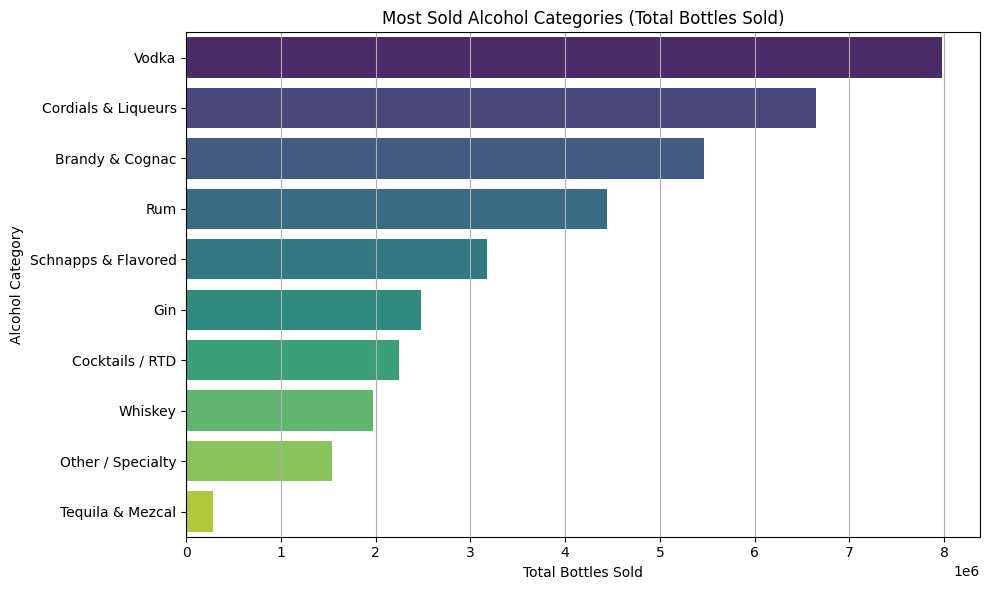

In [ ]:
# Group by Alcohol Category and sum the Bottles Sold
top_categories = (
    cleaned_df.groupby('Alcohol Category')['Bottles Sold']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, x='Bottles Sold', y='Alcohol Category', palette='viridis')
plt.title("Most Sold Alcohol Categories (Total Bottles Sold)")
plt.xlabel("Total Bottles Sold")
plt.ylabel("Alcohol Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
print(cleaned_df.columns.tolist())

['Date', 'Alcohol Category', 'Bottles Sold', 'datetime', 'temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex', 'month', 'weekday', 'year', 'is_weekend', 'dayofyear', 'quarter', 'weekofyear', 'day', 'is_holiday', 'season']


In [ ]:
cleaned_df.dtypes


Date                datetime64[ns]
Alcohol Category            object
Bottles Sold                 int64
datetime                    object
temp                       float64
humidity                   float64
precip                     float64
snow                       float64
windspeed                  float64
cloudcover                 float64
uvindex                      int64
month                        int32
weekday                      int32
year                         int32
is_weekend                   int64
dayofyear                    int32
quarter                      int32
weekofyear                  UInt32
day                          int32
is_holiday                   int64
dtype: object

In [ ]:
print(cleaned_df.count())

Date                11307
Alcohol Category    11307
Bottles Sold        11307
datetime            11307
temp                11307
humidity            11307
precip              11307
snow                11307
windspeed           11307
cloudcover          11307
uvindex             11307
month               11307
weekday             11307
year                11307
is_weekend          11307
dayofyear           11307
quarter             11307
weekofyear          11307
day                 11307
is_holiday          11307
dtype: int64


# **VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np


features = ['temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex']
# features = ['temp', 'precip', 'snow', 'windspeed', 'cloudcover']

# features = ['temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex', 'month', 'weekday', 'year', 'is_weekend', 'is_holiday', 'dayofyear', 'quarter', 'weekofyear','day']


X_vif = cleaned_df[features].copy()

X_vif = X_vif.astype('float64')


X_vif = X_vif.dropna()



# VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(features))]

print(vif_data.sort_values(by='VIF', ascending=False))


      Feature        VIF
1    humidity  21.594176
6     uvindex  10.658876
5  cloudcover  10.163649
4   windspeed   8.464273
0        temp   3.425268
2      precip   1.305222
3        snow   1.129394


In [ ]:
correlation_matrix = cleaned_df[features].corr(numeric_only=True)
print(correlation_matrix)


                temp  humidity    precip      snow  windspeed  cloudcover  \
temp        1.000000 -0.055211  0.135262 -0.248358  -0.170082   -0.209355   
humidity   -0.055211  1.000000  0.385695  0.151828  -0.073596    0.619273   
precip      0.135262  0.385695  1.000000  0.055378   0.113940    0.298760   
snow       -0.248358  0.151828  0.055378  1.000000   0.087554    0.173551   
windspeed  -0.170082 -0.073596  0.113940  0.087554   1.000000    0.154120   
cloudcover -0.209355  0.619273  0.298760  0.173551   0.154120    1.000000   
uvindex     0.572207 -0.490382 -0.128651 -0.224207  -0.146119   -0.558814   

             uvindex  
temp        0.572207  
humidity   -0.490382  
precip     -0.128651  
snow       -0.224207  
windspeed  -0.146119  
cloudcover -0.558814  
uvindex     1.000000  


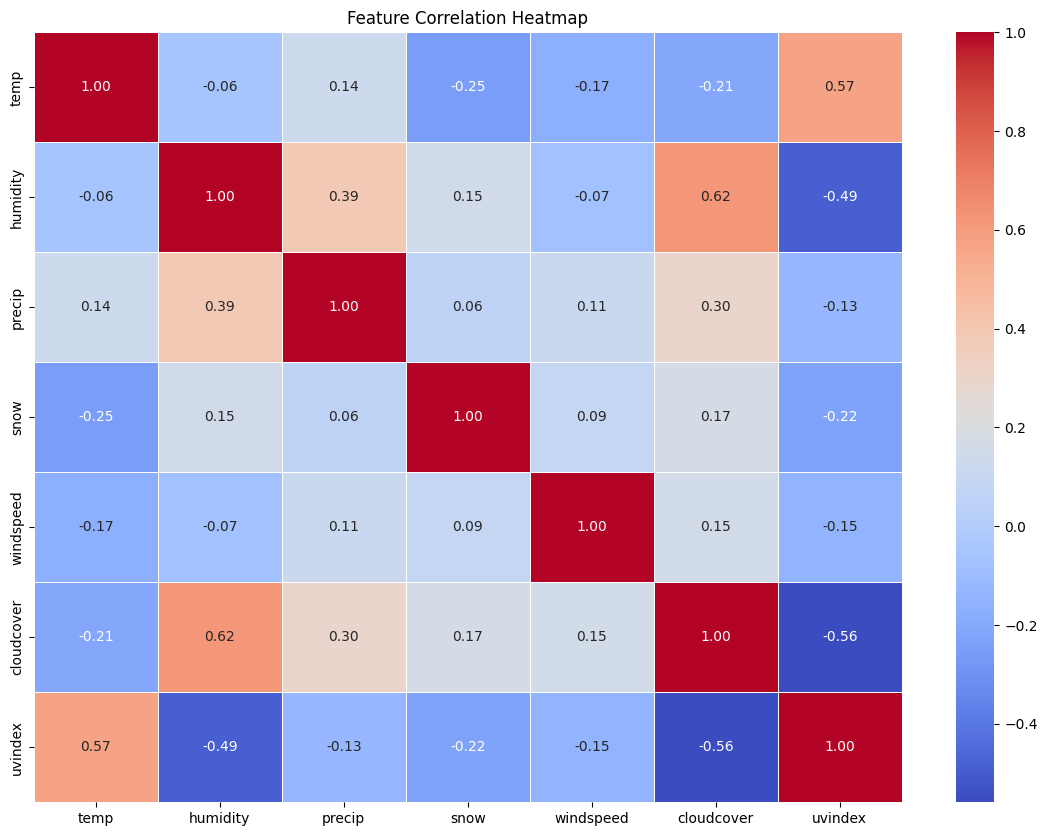

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
cleaned_df = cleaned_df.drop(columns=['year'])

## **Combine humidity, uvindex, and cloudcover into a climate index using PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# correlated features
climate_features = ['humidity', 'uvindex', 'cloudcover']

# StandardiSE
scaler = StandardScaler()
climate_scaled = scaler.fit_transform(cleaned_df[climate_features])

# PCA
pca = PCA(n_components=1)
cleaned_df['climate_index'] = pca.fit_transform(climate_scaled)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


# features = ['temp', 'precip', 'snow', 'windspeed', 'month', 'weekday', 'humidity', 'uvindex', 'cloudcover']
features = ['temp', 'precip', 'snow', 'windspeed', 'climate_index']

X_vif = cleaned_df[features].dropna()

vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(len(features))]

print(vif_data.sort_values(by='VIF', ascending=False))


         Feature       VIF
0           temp  2.103439
3      windspeed  1.938123
1         precip  1.350620
4  climate_index  1.334967
2           snow  1.121826


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression



--- Brandy & Cognac ---


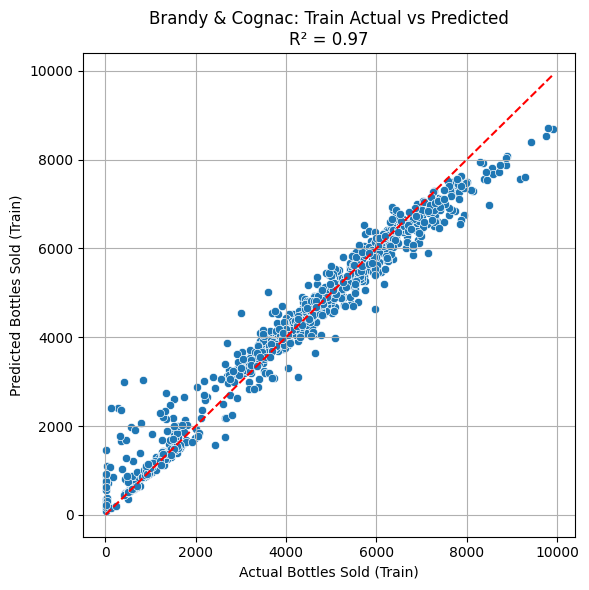

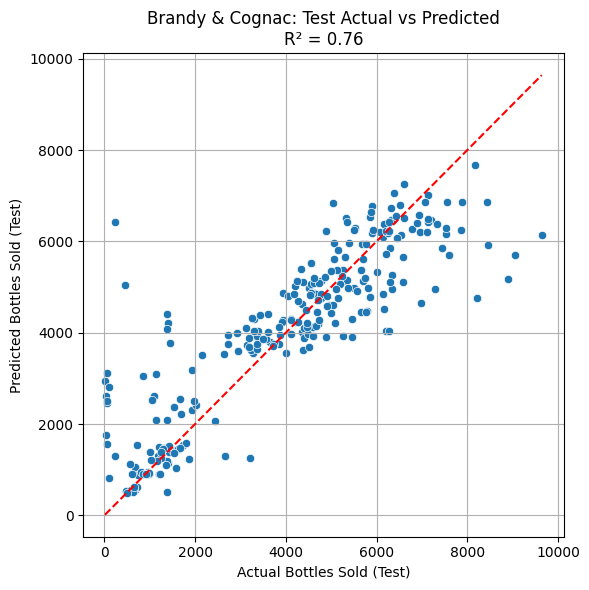


--- Cocktails / RTD ---


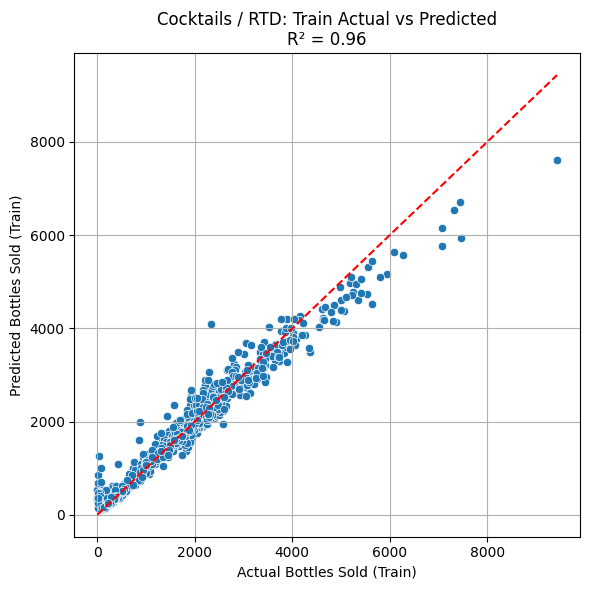


--- Cordials & Liqueurs ---



--- Gin ---


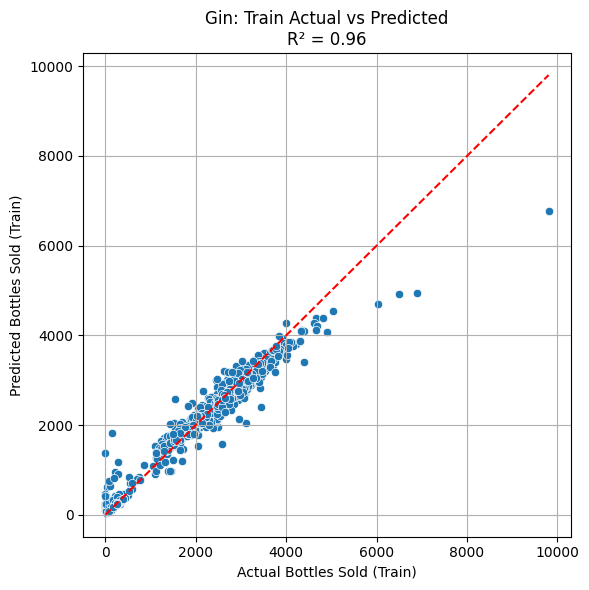


--- Other / Specialty ---


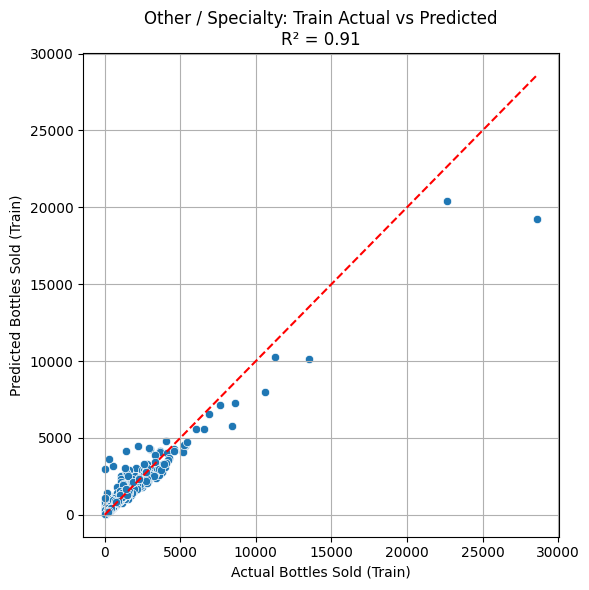

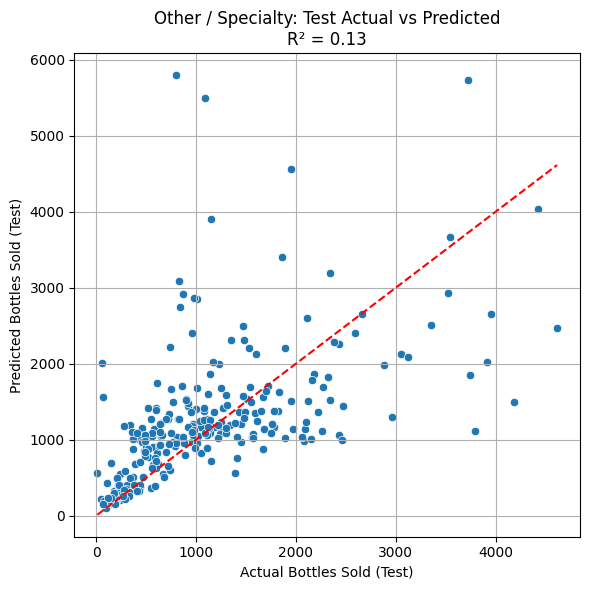


--- Rum ---


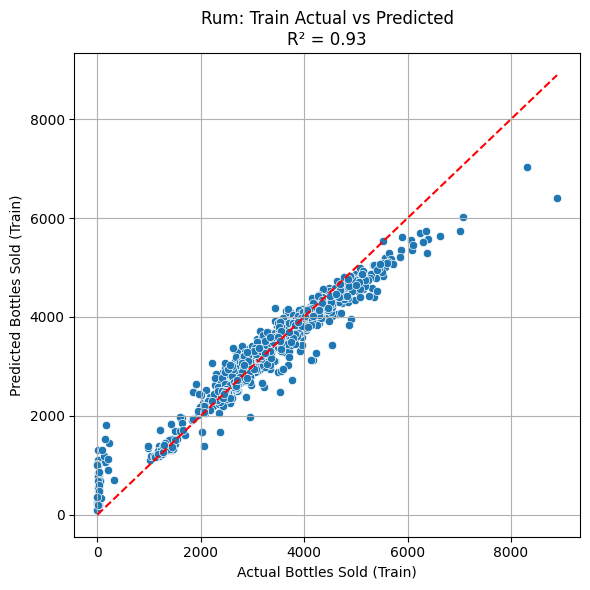

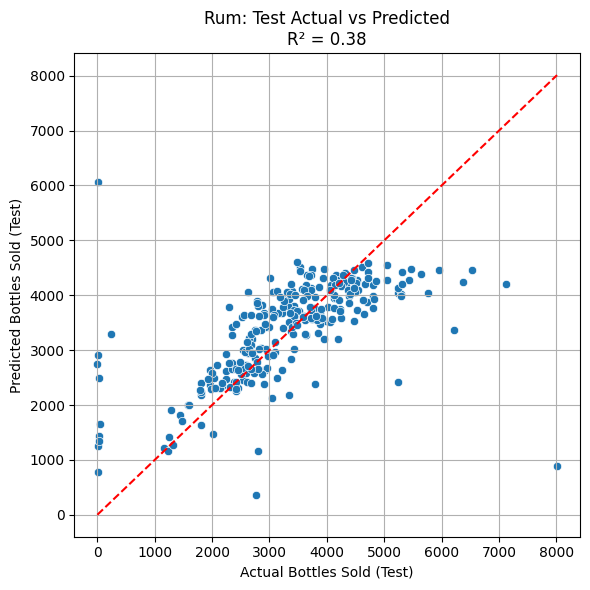


--- Schnapps & Flavored ---


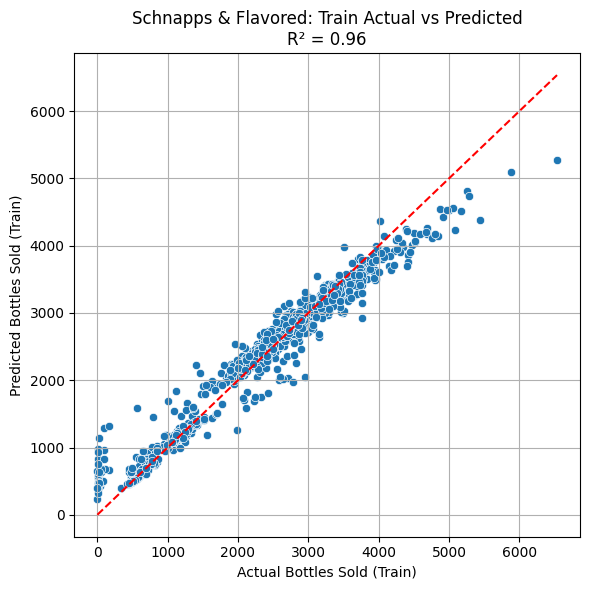

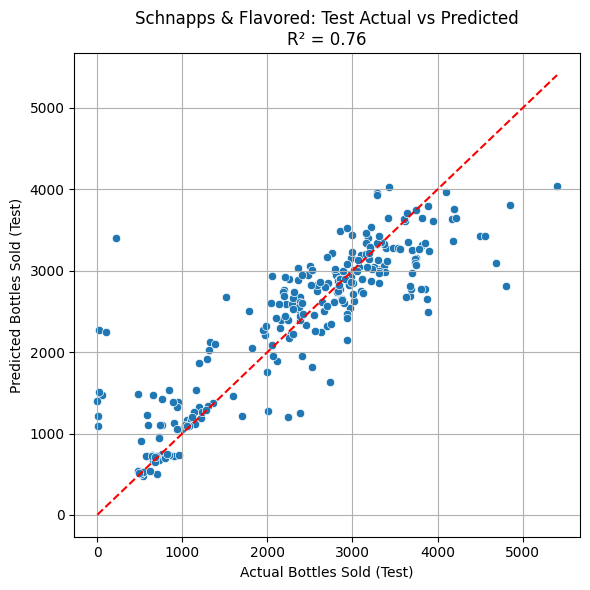


--- Vodka ---


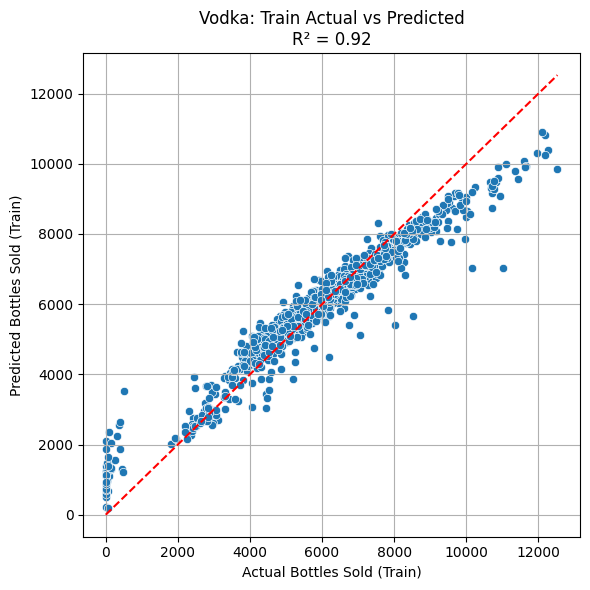

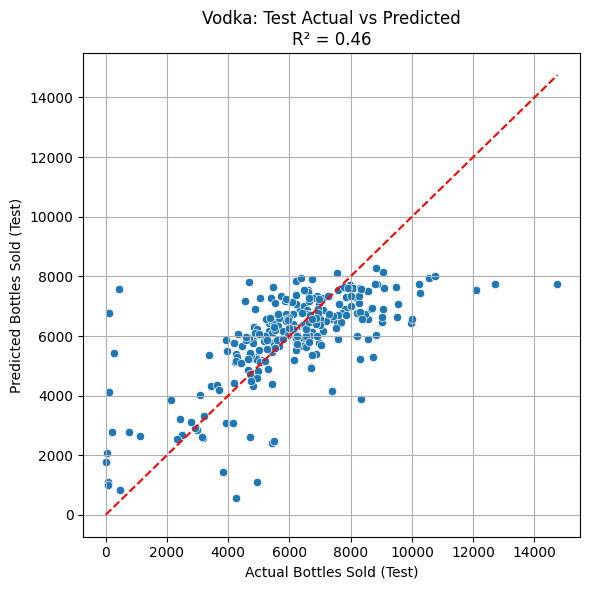


--- Whiskey ---


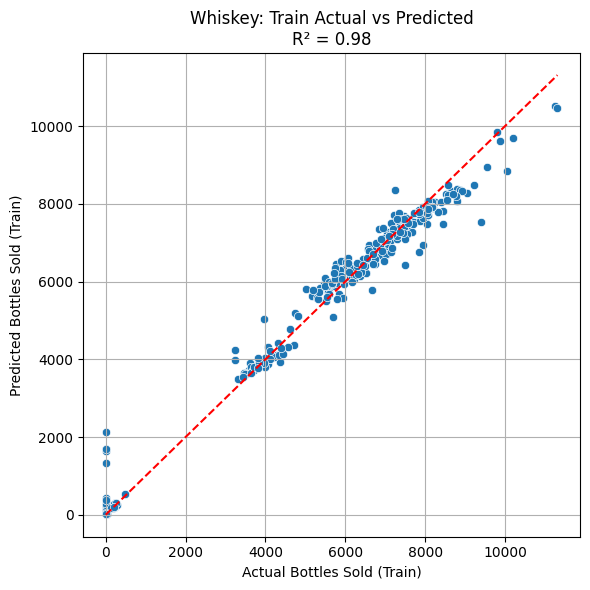

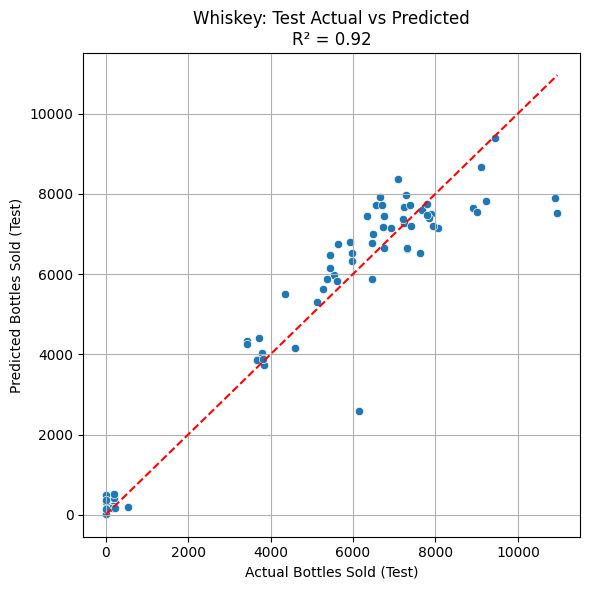


--- Tequila & Mezcal ---


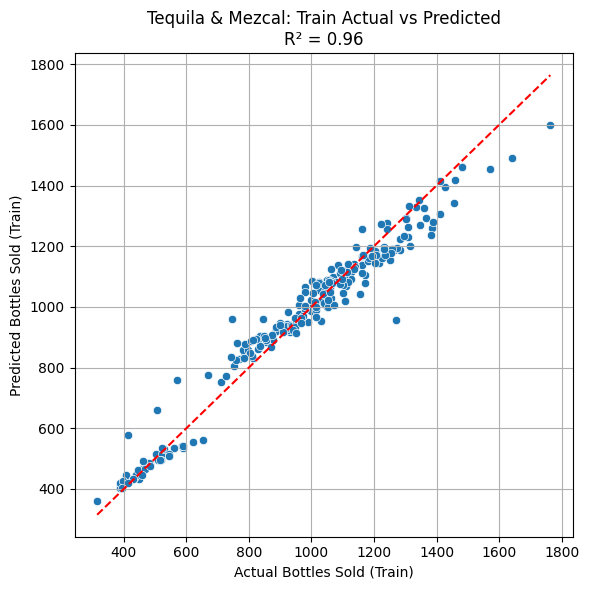

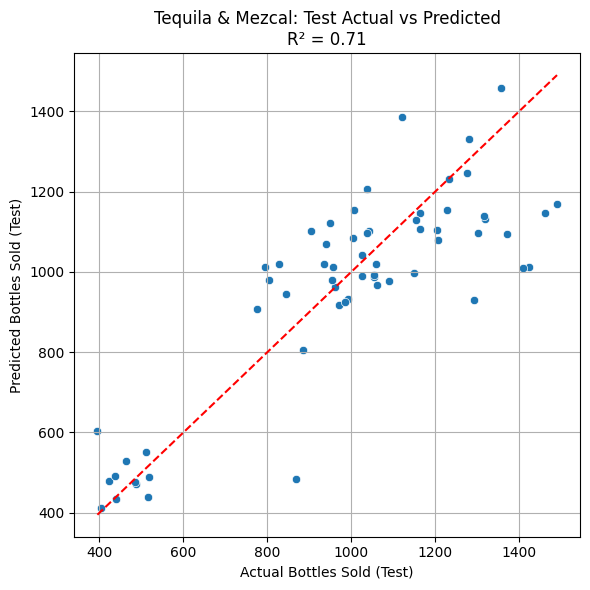

In [ ]:

# Define MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# weather_features = ['temp', 'precip', 'snow', 'windspeed','climate_index']
features = ['temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex', 'month', 'weekday', 'year', 'is_weekend', 'dayofyear', 'quarter', 'weekofyear', 'day', 'is_holiday']
# features = ['temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex', 'month', 'weekday', 'year', 'is_weekend', 'dayofyear', 'quarter', 'weekofyear', 'day', 'is_holiday']

results = []

for category in cleaned_df['Alcohol Category'].unique():

    # Subset data
    df_cat = cleaned_df[cleaned_df['Alcohol Category'] == category].copy()
    X = df_cat[features]
    y = df_cat['Bottles Sold']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )


    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    # model = XGBRegressor(n_estimators=100, random_state=42)
    # model = Ridge(alpha=1.0)
    # model = Lasso(alpha=0.1)
    # model = LinearRegression()


    model.fit(X_train, y_train)

    # Train predictions
    y_train_pred = model.predict(X_train)
    train_residuals = y_train - y_train_pred

    # Test predictions
    y_test_pred = model.predict(X_test)
    test_residuals = y_test - y_test_pred

    # Plot Train Predictions
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_train, y=y_train_pred)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
    plt.xlabel("Actual Bottles Sold (Train)")
    plt.ylabel("Predicted Bottles Sold (Train)")
    plt.title(f"{category}: Train Actual vs Predicted\nR² = {r2_score(y_train, y_train_pred):.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Test Predictions
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_test_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line
    plt.xlabel("Actual Bottles Sold (Test)")
    plt.ylabel("Predicted Bottles Sold (Test)")
    plt.title(f"{category}: Test Actual vs Predicted\nR² = {r2_score(y_test, y_test_pred):.2f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Train metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mape_val = mape(y_train, y_train_pred)

    # Test metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - test_r2) * ((n - 1) / (n - p - 1))
    sse = np.sum(test_residuals ** 2)
    aic = n * np.log(sse / n) + 2 * (p + 1)
    explained_variance = explained_variance_score(y_test, y_test_pred)
    test_mape_val = mape(y_test, y_test_pred)

    results.append({
        'Alcohol Category': category,
        'Train R²': train_r2,
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train MAPE': train_mape_val,
        'Test R²': test_r2,
        'Test Adjusted R²': adj_r2,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test MAPE': test_mape_val,
        'Test AIC': aic,
        'Test MSE': test_mse,
        'Test Explained Variance': explained_variance
    })

# Create results dataframe
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test R²', ascending=False, inplace=True)


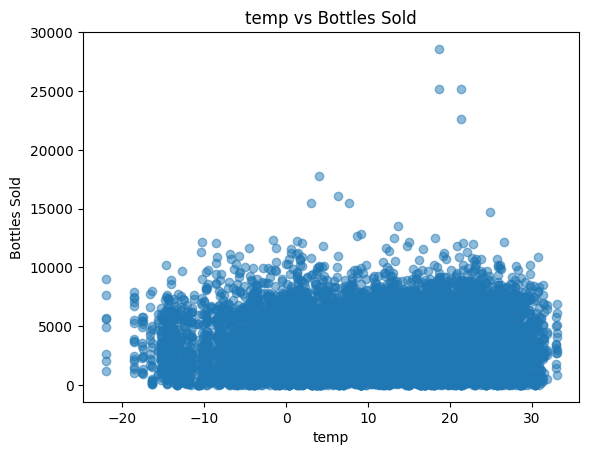

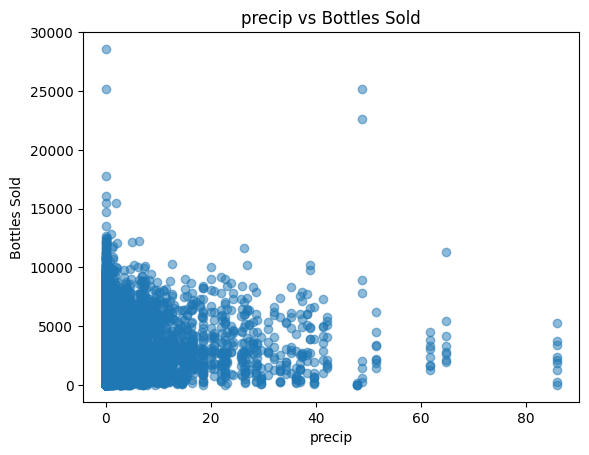

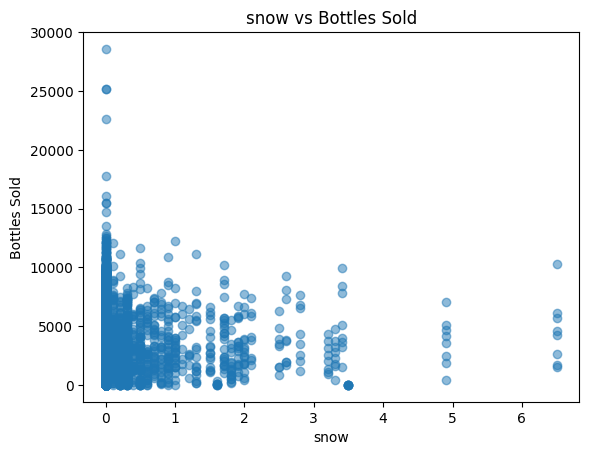

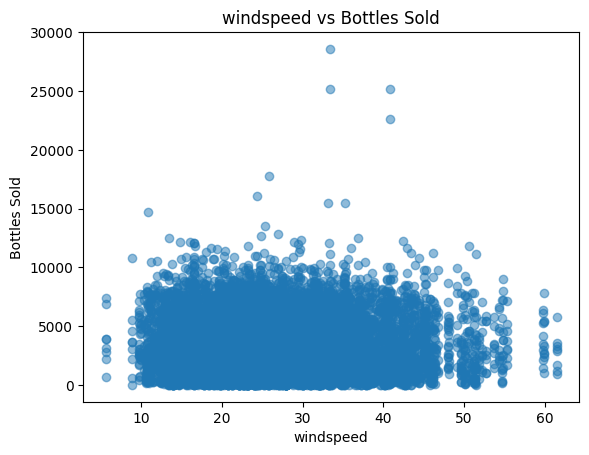

In [ ]:
import matplotlib.pyplot as plt

for col in weather_features:
    plt.scatter(cleaned_df[col], cleaned_df['Bottles Sold'], alpha=0.5)
    plt.title(f'{col} vs Bottles Sold')
    plt.xlabel(col)
    plt.ylabel('Bottles Sold')
    plt.show()


In [ ]:
# Compute both Pearson and Spearman correlations
pearson_corr = cleaned_df[weather_features + ['Bottles Sold']].corr(method='pearson')
spearman_corr = cleaned_df[weather_features + ['Bottles Sold']].corr(method='spearman')

# Compare correlations with the target
print("Pearson correlation with Bottles Sold:\n", pearson_corr['Bottles Sold'].sort_values(ascending=False))
print("\nSpearman correlation with Bottles Sold:\n", spearman_corr['Bottles Sold'].sort_values(ascending=False))



Pearson correlation with Bottles Sold:
 Bottles Sold     1.000000
precip           0.010621
temp             0.009721
snow             0.007577
windspeed        0.004955
climate_index   -0.012935
Name: Bottles Sold, dtype: float64

Spearman correlation with Bottles Sold:
 Bottles Sold     1.000000
precip           0.016800
temp             0.012656
windspeed       -0.003972
snow            -0.006370
climate_index   -0.018702
Name: Bottles Sold, dtype: float64


# **Just looking at Whiskey Category for simplicity**

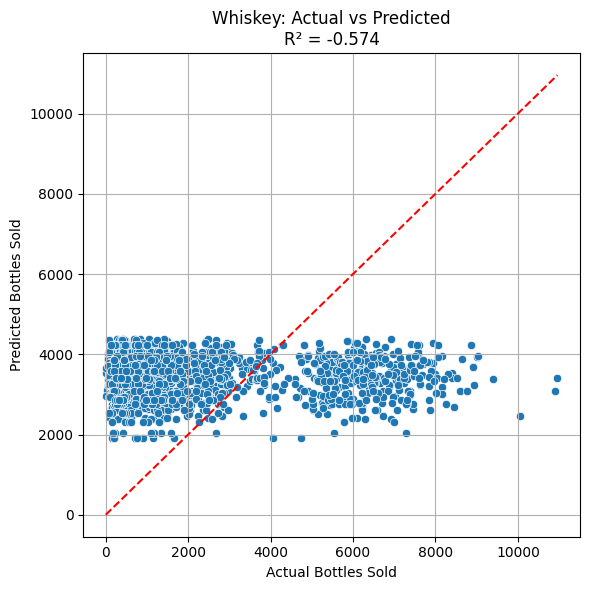

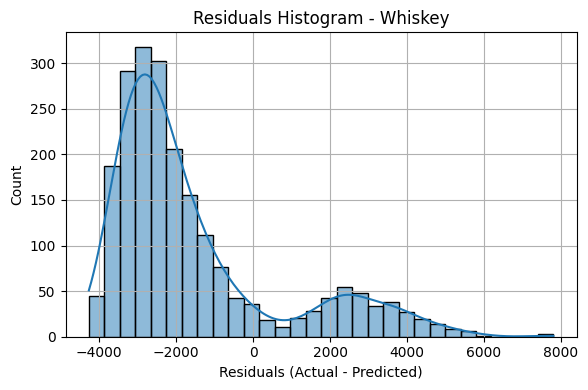

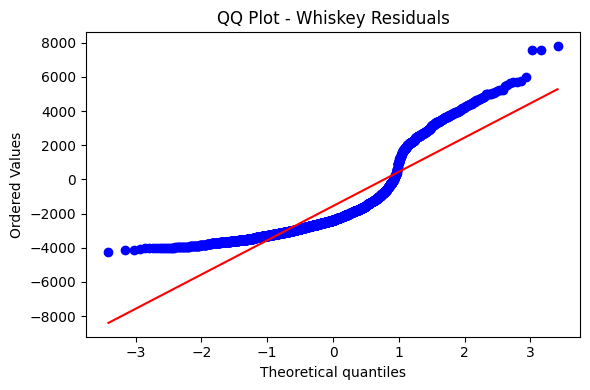

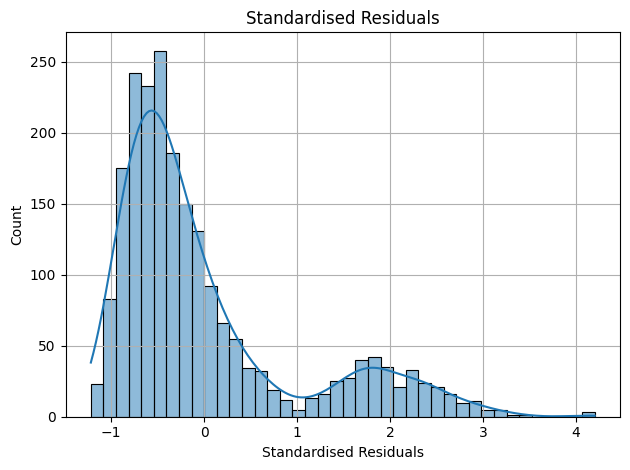

📊 Evaluation for Whiskey:
RMSE: 2715.37
MAE: 2526.64
MSE: 7373234.52
R²: -0.5740
Adjusted R²: -0.5777
AIC: 33931.67
MAPE: 1097.01%
Explained Variance: -0.0573


In [ ]:

# Define MAPE function
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


features = ['temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex',
            'month', 'weekday', 'year', 'is_weekend', 'dayofyear', 'quarter',
            'weekofyear', 'day', 'is_holiday']

selected_features = [
    'temp', 'humidity', 'windspeed', 'cloudcover',
    'month', 'weekday', 'dayofyear', 'weekofyear' , 'year'
]
weather_features = ['temp', 'precip', 'snow', 'windspeed','climate_index']

from sklearn.preprocessing import StandardScaler


# JUST the Whiskey
df_cat = cleaned_df[cleaned_df['Alcohol Category'] == 'Whiskey'].copy()

X = df_cat[weather_features]
y = df_cat['Bottles Sold']



# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Bottles Sold")
plt.ylabel("Predicted Bottles Sold")
plt.title(f"Whiskey: Actual vs Predicted\nR² = {r2_score(y_test, y_pred):.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Histogram - Whiskey")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot - Whiskey Residuals")
plt.tight_layout()
plt.show()

standardized_residuals = (residuals - residuals.mean()) / residuals.std()
sns.histplot(standardized_residuals, kde=True)
plt.title("Standardised Residuals")
plt.xlabel("Standardised Residuals")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()



mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
sse = np.sum(residuals ** 2)
aic = n * np.log(sse / n) + 2 * (p + 1)
explained_variance = explained_variance_score(y_test, y_pred)


print(f"📊 Evaluation for Whiskey:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"AIC: {aic:.2f}")
print(f"MAPE: {mape(y_test, y_pred):.2f}%")
print(f"Explained Variance: {explained_variance:.4f}")


#**Feature Importance**

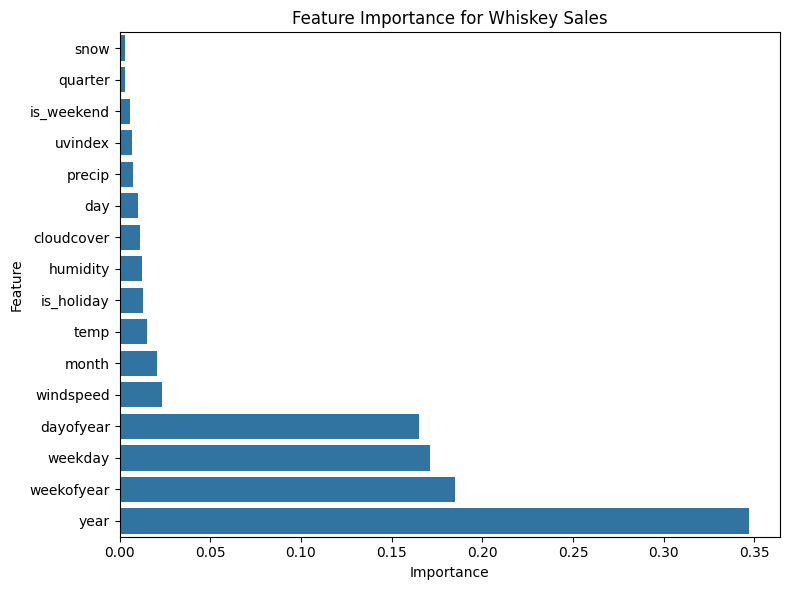

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# # Filter Whiskey only
df_whiskey = cleaned_df[cleaned_df['Alcohol Category'] == 'Whiskey']
features = ['temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex', 'month', 'weekday', 'year', 'is_weekend', 'dayofyear', 'quarter', 'weekofyear', 'day', 'is_holiday']
X = df_whiskey[features]
y = df_whiskey['Bottles Sold']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plot feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance')

plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Whiskey Sales')
plt.tight_layout()
plt.savefig("whiskey_feature_importance.png")  # <- Add this image to your slide
plt.show()


# **Import Weather Data 2018**

In [ ]:
weather_2018_file_path =  f"/content/drive/My Drive/Data Mining Project/Data/weather_2018.csv"
weather_2018 = pd.read_csv(weather_2018_file_path)

In [ ]:
weather_2018['Date'] = pd.to_datetime(weather_2018['datetime'], format='%d/%m/%Y', errors='coerce')
weather_2018['month'] = weather_2018['Date'].dt.month
weather_2018['weekday'] = weather_2018['Date'].dt.weekday
weather_2018['year'] = weather_2018['Date'].dt.year
weather_2018['dayofyear'] = weather_2018['Date'].dt.dayofyear
weather_2018['quarter'] = weather_2018['Date'].dt.quarter
weather_2018['weekofyear'] = weather_2018['Date'].dt.isocalendar().week
weather_2018['day'] = weather_2018['Date'].dt.day
weather_2018['is_weekend'] = weather_2018['weekday'].isin([5, 6]).astype(int)
us_holidays = holidays.UnitedStates()
weather_2018['is_holiday'] = weather_2018['Date'].isin(us_holidays).astype(int)


In [ ]:
print(weather_2018.columns.tolist())

['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations', 'Date', 'month', 'weekday', 'year', 'dayofyear', 'quarter', 'weekofyear', 'day', 'is_weekend', 'is_holiday']


In [ ]:
weather_2018_features = [
    'temp', 'humidity', 'precip', 'snow', 'windspeed', 'cloudcover', 'uvindex',
    'month', 'weekday', 'year', 'is_weekend', 'dayofyear', 'quarter',
    'weekofyear', 'day', 'is_holiday'
]


In [ ]:
# Select features for 2018
X_2018 = weather_2018[weather_2018_features]

X_2018 = X_2018.dropna()

# Predict
predicted_2018 = model.predict(X_2018)

# Add predictions to the dataframe
weather_2018['Predicted Bottles Sold'] = predicted_2018

# Sample a few rowsd
weather_2018[['Date', 'Predicted Bottles Sold']].head()


Date  Predicted Bottles Sold
0 2012-01-01                2.946712
1 2012-01-02                2.971769
2 2012-01-03                3.044788
3 2012-01-04                2.844349
4 2012-01-05                2.767136

In [ ]:
# Reverse log1p transformation
weather_2018['Predicted Bottles Sold'] = np.expm1(predicted_2018)


In [ ]:
# Save only the columns you need
weather_2018_only[['Date', 'Predicted Bottles Sold']].to_csv('/content/drive/My Drive/Data Mining Project/Data/predicted_whiskey_sales_2018.csv', index=False)


****************************************************************************************************************************************************************

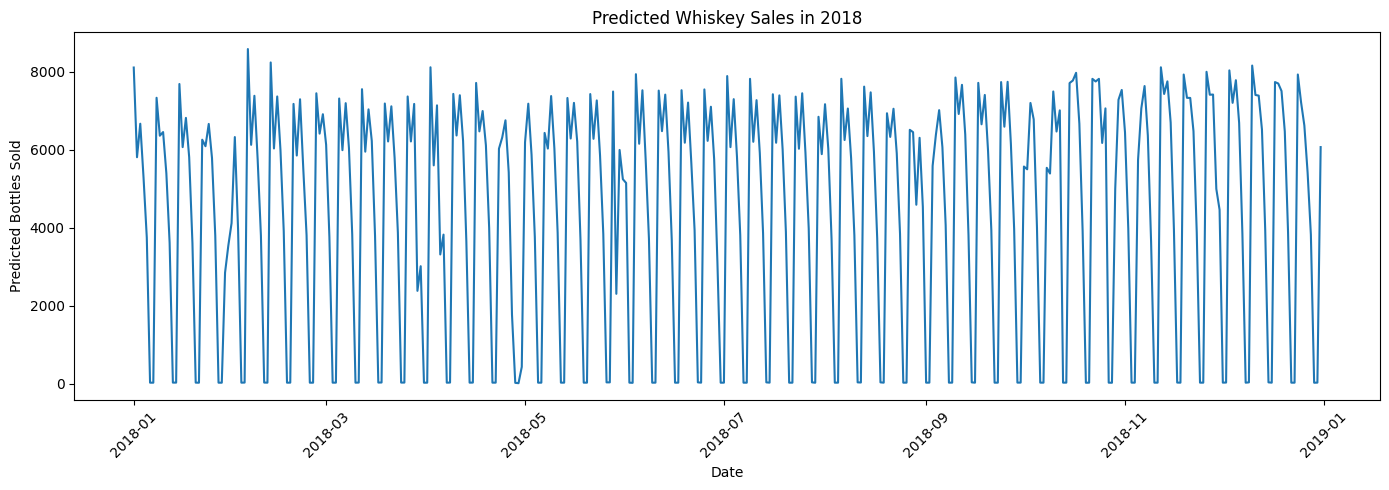

In [ ]:


# Filter just 2018 data
weather_2018_only = weather_2018[weather_2018['Date'].dt.year == 2018].copy()

# Plot
plt.figure(figsize=(14, 5))
sns.lineplot(data=weather_2018_only, x='Date', y='Predicted Bottles Sold')
plt.title('Predicted Whiskey Sales in 2018')
plt.xlabel('Date')
plt.ylabel('Predicted Bottles Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


weather_2018['Date'] = pd.to_datetime(weather_2018['Date'])

# Filter for 2018 only
weather_2018 = weather_2018[weather_2018['Date'].dt.year == 2018]

# DF to store all predictions
all_preds_2018 = pd.DataFrame()


for category in cleaned_df['Alcohol Category'].unique():

    df_cat = cleaned_df[cleaned_df['Alcohol Category'] == category].copy()
    X = df_cat[features]
    y = df_cat['Bottles Sold']

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predict for 2018
    X_2018 = weather_2018[features].dropna()
    y_2018_pred = model.predict(X_2018)

    # Add to prediction DataFrame
    temp_df = weather_2018.iloc[:len(y_2018_pred)].copy()
    temp_df['Predicted Bottles Sold'] = y_2018_pred
    temp_df['Alcohol Category'] = category

    all_preds_2018 = pd.concat([
        all_preds_2018,
        temp_df[['Date', 'Alcohol Category', 'Predicted Bottles Sold']]
    ])


plt.figure(figsize=(14, 6))
sns.lineplot(data=all_preds_2018, x='Date', y='Predicted Bottles Sold', hue='Alcohol Category')
plt.title("Predicted Bottles Sold in 2018 by Alcohol Category (Daily)")
plt.xlabel("Date")
plt.ylabel("Predicted Bottles Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Alcohol Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#Weekly Aggregation
weekly_preds = (
    all_preds_2018
    .copy()
    .assign(Week=all_preds_2018['Date'].dt.to_period('W').apply(lambda r: r.start_time))
    .groupby(['Week', 'Alcohol Category'])['Predicted Bottles Sold']
    .sum()
    .reset_index()
)

# Weekly Totals
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_preds, x='Week', y='Predicted Bottles Sold', hue='Alcohol Category')
plt.title("Weekly Predicted Bottles Sold (2018)")
plt.xlabel("Week")
plt.ylabel("Total Bottles Sold (per Week)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Alcohol Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Group by week and alcohol category
weekly_totals = (
    all_preds_2018
    .copy()
    .assign(Week=lambda df: df['Date'].dt.to_period('W').apply(lambda r: r.start_time))
    .groupby(['Week', 'Alcohol Category'])['Predicted Bottles Sold']
    .sum()
    .reset_index()
)

# Remove final week of 2018 (makes chart look weird)
weekly_totals = weekly_totals[weekly_totals['Week'] < '2018-12-24']

# Plot weekly totals
plt.figure(figsize=(16, 6))
sns.lineplot(data=weekly_totals, x='Week', y='Predicted Bottles Sold', hue='Alcohol Category')
plt.title("Weekly Predicted Bottles Sold (2018)")
plt.xlabel("Week")
plt.ylabel("Total Bottles Sold (per Week)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Alcohol Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Monthly Aggregation
monthly_preds = (
    all_preds_2018
    .copy()
    .assign(Month=all_preds_2018['Date'].dt.to_period('M').astype(str))
    .groupby(['Month', 'Alcohol Category'])['Predicted Bottles Sold']
    .sum()
    .reset_index()
)

#  Plot: Monthly Totals
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_preds, x='Month', y='Predicted Bottles Sold', hue='Alcohol Category')
plt.title("Monthly Predicted Bottles Sold (2018)")
plt.xlabel("Month")
plt.ylabel("Total Bottles Sold (per Month)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Alcohol Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
weather_2018_only['Rolling Avg'] = weather_2018_only['Predicted Bottles Sold'].rolling(window=7).mean()

plt.figure(figsize=(14, 5))
sns.lineplot(data=weather_2018_only, x='Date', y='Rolling Avg')
plt.title('Predicted Whiskey Sales in 2018 (7-Day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Predicted Bottles Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

weather_2018_only[['Date', 'Predicted Bottles Sold']].to_csv('/content/drive/My Drive/Data Mining Project/Data/predicted_whiskey_sales_2018.csv', index=False)


**********************************************************************************************


*********************************************************************